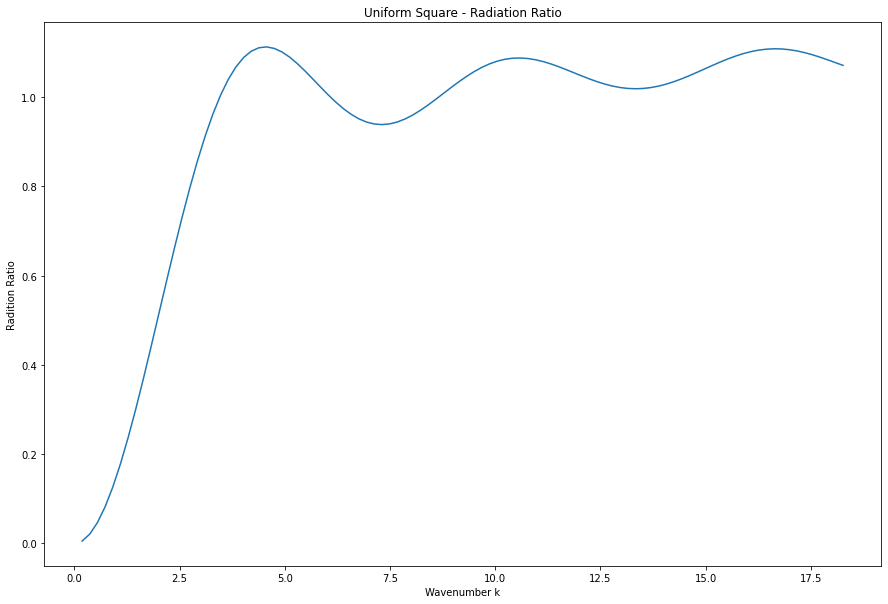

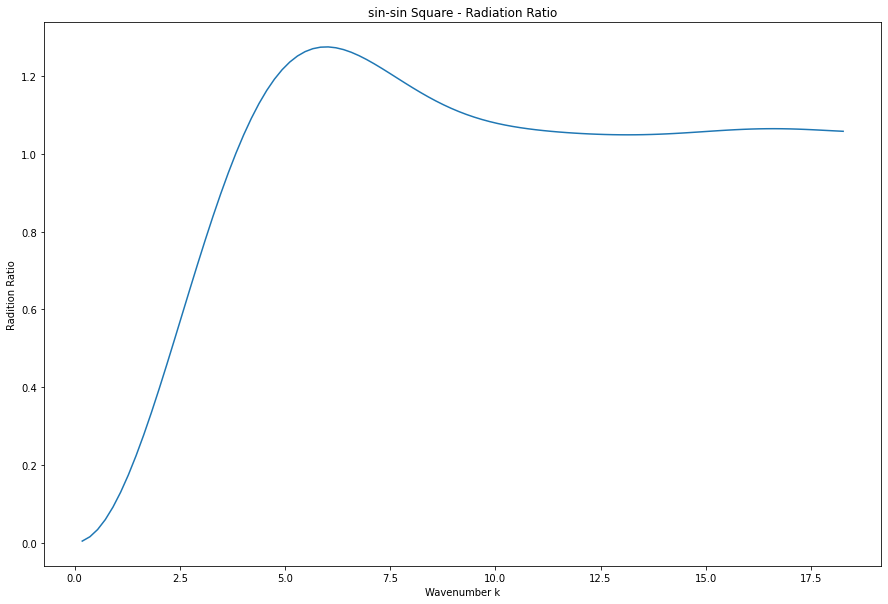

CPU times: user 1min 55s, sys: 1min 16s, total: 3min 11s
Wall time: 50.7 s


In [1]:
%%time
import abem as ab
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


def plot_radiation_ratio(title, wavenumbers, sigmas):
    plt.rcParams['figure.figsize'] = [15, 10]
    plt.title(title + ' - Radiation Ratio')
    plt.plot(wavenumbers, sigmas, '-', label='BEM')
    plt.xlabel('Wavenumber k')
    plt.ylabel('Radition Ratio')
    plt.show()


exterior_point = np.array([[0.5, 0.5, 0.1]], dtype=np.float32)

# Test Problem 1

solver = ab.RayleighSolver3D(ab.square_3d())

boundary_condition = solver.neumann_boundary_condition()
boundary_condition.f.fill(1.0)

wavenumbers = np.empty(100, dtype=np.float32)
sigmas = np.empty(100, dtype=np.float32)
for i in range(100):
    f = 10 * (i+1)
    k = ab.frequency_to_wavenumber(f)
    solution = solver.solve_boundary(k, boundary_condition)
    wavenumbers[i] = k
    sigmas[i] = solution.radiation_ratio()

plot_radiation_ratio('Uniform Square', wavenumbers, sigmas)

# Test Problem 2

solver = ab.RayleighSolver3D(ab.square_3d())

boundary_condition = solver.neumann_boundary_condition()
boundary_condition.f = np.sin(np.pi * solver.centers[:, 0]) * np.sin(np.pi * solver.centers[:, 1])

wavenumbers = np.empty(100, dtype=np.float32)
sigmas = np.empty(100, dtype=np.float32)
for i in range(100):
    f = 10 * (i+1)
    k = ab.frequency_to_wavenumber(f)
    solution = solver.solve_boundary(k, boundary_condition)
    wavenumbers[i] = k
    sigmas[i] = solution.radiation_ratio()

plot_radiation_ratio('sin-sin Square', wavenumbers, sigmas)
